In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
def analyses(filepath):
    files = pd.read_csv(filepath)
    
    # FIRST CHECK: CONVERSION SOFTWARE VERSIONS
    check = files.iloc[0, 7]
    valid = True
    
    for i in files.index:
        if check != files.iloc[i, 7]:
            valid = False
            
    print("All Conversion Softwares are the same: " + str(valid))
    
    # SECOND CHECK: HEATMAP
    sns.heatmap(files.corr(), cmap=sns.diverging_palette(h_neg=240, h_pos=10, n=9, sep=1, center="dark"), center=0)

All Conversion Softwares are the same: True


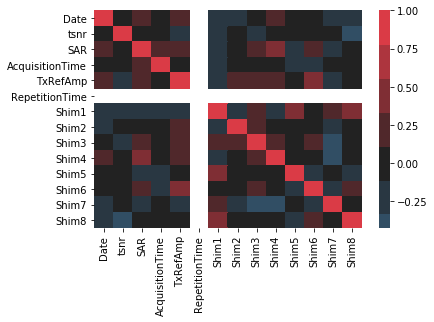

In [3]:
analyses('../data/extractions/p2_BOLD.csv')

All Conversion Softwares are the same: True


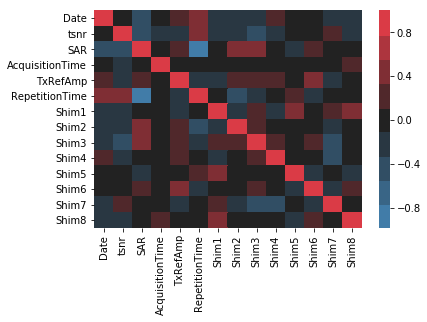

In [4]:
analyses('../data/extractions/p2X_BOLD.csv')

In [5]:
files = pd.read_csv('../data/extractions/p2_BOLD.csv')
df = pd.DataFrame(files,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8'])

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")
df['Date2'] = df['Date'].map(pd.datetime.toordinal)

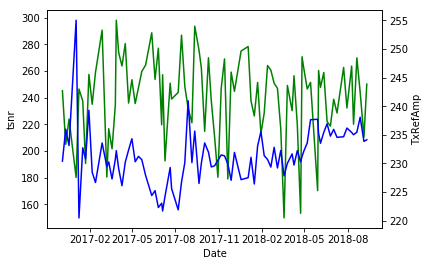

In [7]:
sns.lineplot(x="Date", y="tsnr", data=df, color="g")
ax2 = plt.twinx()
sns.lineplot(x="Date", y="TxRefAmp", data=df, color="b", ax=ax2)

In [10]:
import datetime as dt

# sin and cos graphs
n = 94
dates = [dt.datetime(2016, 11, 28)+dt.timedelta(days=i*7) for i in range(n)]

values = [np.sin(np.pi*i/(26)) for i in range(n)]
values2 = [np.cos(np.pi*i/(26)) for i in range(n)]

sin = pd.DataFrame(values)
sin.columns = ['sin']

cos = pd.DataFrame(values2)
cos.columns = ['cos']

df = df.join(sin)
df = df.join(cos)

In [11]:
X = df[["Date2", "TxRefAmp", "SAR", "AcquisitionTime",
       'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
        'Shim5', 'Shim6', 'Shim7', 'Shim8', 'sin', 'cos']]
X = sm.add_constant(X)

y = df["tsnr"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tsnr   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1.779
Date:                Thu, 14 Feb 2019   Prob (F-statistic):             0.0580
Time:                        14:36:41   Log-Likelihood:                -417.92
No. Observations:                  89   AIC:                             865.8
Df Residuals:                      74   BIC:                             903.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Date2              -0.0209      0.022     -0.937      0.352      -0.065       0.024
TxRefAmp           -1.4794      0.902     -1.640      0.105      -3.277       0.318
SAR              -221.2238    557.618     -0.397      0.693   -1332.303     889.855
AcquisitionTime     0.0006      0.003      0.183      0.855      -0.006       0.007
RepetitionTime   1.032e+04   7924.337      1.303      0.197   -5465.804    2.61e+04
Shim1              -1.0158      0.930     -1.092      0.278      -2.868       0.837
Shim2               0.1553      0.464      0.335      0.739      -0.768       1.079
Shim3              -0.1051      0.532     -0.198      0.844      -1.165       0.955
Shim4               0.0418      0.088      0.472      0.638      -0.135       0.218
Shim5               0.0125      0.119      0.105      0.917      -0.225       0.250
Shim6               0.0930      0.051      1.841      0.070      -0.008       0.194
Shim7               0.1072      0.134      0.798      0.427      -0.160       0.375
Shim8              -0.3158      0.160     -1.975      0.052      -0.634       0.003
sin                -1.1468      4.891     -0.234      0.815     -10.892       8.598
cos               -10.6418      5.267     -2.020      0.047     -21.137      -0.146
==============================================================================
Omnibus:                       19.604   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.387
Skew:                          -1.059   Prob(JB):                     3.07e-06
Kurtosis:                       4.538   Cond. No.                     1.90e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
prediction = predictions.to_frame()
prediction.columns = ['model']
df2 = df.join(prediction)

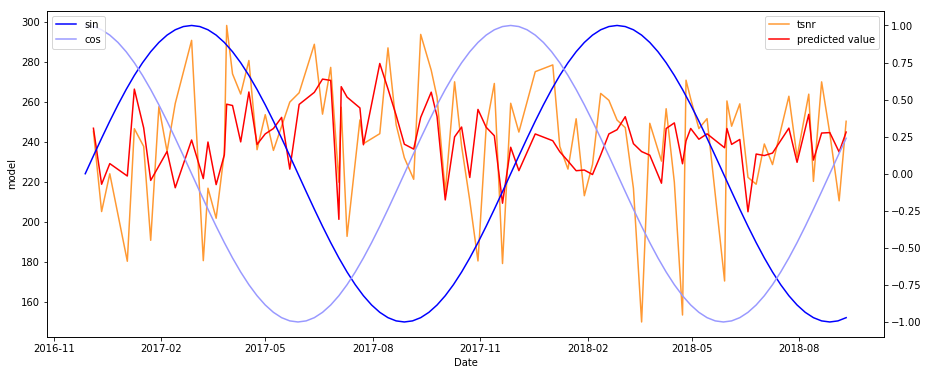

In [13]:
import matplotlib.pyplot
plt.figure(figsize=(15, 6))

ax = sns.lineplot(x="Date", y="tsnr", data=df2, color="#ff9933")
ax_txrefamp = plt.twinx()
sns.lineplot(x="Date", y="model", data=df2, color="r", ax=ax)
ax.legend(['tsnr', 'predicted value'])

plt.plot(dates,values, color='b', label="sin")
plt.plot(dates,values2, color='#9999ff', label="cos")
plt.legend(['sin', 'cos'], loc='upper left')

In [16]:
# p2Xlasdkjfka_BOLD.csv
files2 = pd.read_csv('../data/extractions/p2Xs4X35mm_BOLD.csv')
df3 = pd.DataFrame(files2,columns=['Date', 'tsnr', 'TxRefAmp', 'AcquisitionTime', 'SAR',
                                'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
                                'Shim5', 'Shim6', 'Shim7', 'Shim8'])
df3['Date'] = pd.to_datetime(df3['Date'], format="%Y%m%d")
df3['Date2'] = df3['Date'].map(pd.datetime.toordinal)

sin = pd.DataFrame(values)
sin.columns = ['sin']

cos = pd.DataFrame(values2)
cos.columns = ['cos']

df3 = df3.join(sin)
df3 = df3.join(cos)

In [17]:
X3 = df3[["Date2", "TxRefAmp", "SAR", "AcquisitionTime",
       'RepetitionTime', 'Shim1', 'Shim2', 'Shim3', 'Shim4',
        'Shim5', 'Shim6', 'Shim7', 'Shim8', 'sin', 'cos']]
X3 = sm.add_constant(X3)

y2 = df3["tsnr"]

model3 = sm.OLS(y2, X3).fit()
predictions2 = model3.predict(X3)

model3.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tsnr   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     4.543
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           5.15e-06
Time:                        14:37:10   Log-Likelihood:                -392.60
No. Observations:                  90   AIC:                             817.2
Df Residuals:                      74   BIC:                             857.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.408e+04   1.31e+04      1.839      0.070   -2004.934    5.02e+04
Date2              -0.0345      0.018     -1.903      0.061      -0.071       0.002
TxRefAmp           -0.3178      0.684     -0.465      0.644      -1.680       1.045
SAR             -1066.6884    949.051     -1.124      0.265   -2957.714     824.337
AcquisitionTime    -0.0024      0.002     -1.039      0.302      -0.007       0.002
RepetitionTime     -9.6302     34.866     -0.276      0.783     -79.103      59.843
Shim1              -0.6011      0.666     -0.903      0.370      -1.928       0.726
Shim2              -0.1920      0.335     -0.573      0.568      -0.860       0.476
Shim3              -0.3683      0.391     -0.942      0.349      -1.148       0.411
Shim4              -0.0435      0.065     -0.665      0.508      -0.174       0.087
Shim5              -0.1088      0.089     -1.224      0.225      -0.286       0.068
Shim6               0.0660      0.035      1.875      0.065      -0.004       0.136
Shim7               0.1347      0.095      1.417      0.161      -0.055       0.324
Shim8              -0.1359      0.115     -1.178      0.243      -0.366       0.094
sin                -1.6612      3.517     -0.472      0.638      -8.669       5.347
cos                -5.2685      3.926     -1.342      0.184     -13.091       2.554
==============================================================================
Omnibus:                       14.888   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.502
Skew:                          -0.864   Prob(JB):                     0.000158
Kurtosis:                       4.298   Cond. No.                     4.37e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
prediction2 = predictions.to_frame()
prediction2.columns = ['model2']
df4 = df3.join(prediction2)

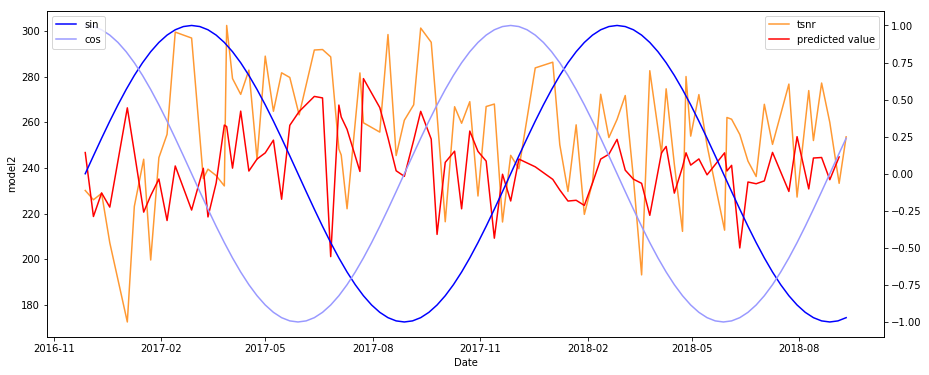

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

ax3 = sns.lineplot(x="Date", y="tsnr", data=df4, color="#ff9933")
ax3_txrefamp = plt.twinx()
sns.lineplot(x="Date", y="model2", data=df4, color="r", ax=ax3)
ax3.legend(['tsnr', 'predicted value'])

plt.plot(dates,values, color='b', label="sin")
plt.plot(dates,values2, color='#9999ff', label="cos")
plt.legend(['sin', 'cos'], loc='upper left')

In [20]:
# F-TEST FOR P2 AND P2X WITH SHIM
#P2
print(model.f_test("Shim1 = Shim2 = Shim3 = Shim4 = Shim5 = Shim6 = Shim7 = Shim8 = 0"))

#P2X
print(model3.f_test("Shim1 = Shim2 = Shim3 = Shim4 = Shim5 = Shim6 = Shim7 = Shim8 = 0"))

<F test: F=array([[2.3262108]]), p=0.027575534459194063, df_denom=74, df_num=8>
<F test: F=array([[3.06936539]]), p=0.004852444946258997, df_denom=74, df_num=8>


In [21]:
# F-TEST FOR P2 AND P2X WITH SIN AND COS
# P2
print(model.f_test("sin = cos = 0"))

#P2X
print(model3.f_test("sin = cos = 0"))

<F test: F=array([[2.07840711]]), p=0.13237324988403779, df_denom=74, df_num=2>
<F test: F=array([[1.01235771]]), p=0.36833747975766434, df_denom=74, df_num=2>
